### Dominant colour Extraction Assignment

##### importing Dependencies

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.cluster import KMeans

##### Read or upload image from the directory

In [2]:
actual_image = img.imread("gaza.jpg")


##### Check the Shape or Resolution of image

In [3]:
print('Actual Image shape/resolution/dimension', actual_image.shape)

Actual Image shape/resolution/dimension (1280, 1920, 3)


### Re-sizing the image

In [4]:
row, col = actual_image.shape[:2]
limit = 700
update_image = cv2.resize(actual_image, (int(limit*float(col)/row), limit))


### checking the pixel size

In [5]:
img_pixels = update_image.reshape((-1, 3))

print('Actual image pixels shape after re-shaping:', img_pixels.shape)
print('update image pixel shape after re-sizing :', update_image.shape)

Actual image pixels shape after re-shaping: (735000, 3)
update image pixel shape after re-sizing : (700, 1050, 3)


In [6]:
%matplotlib inline

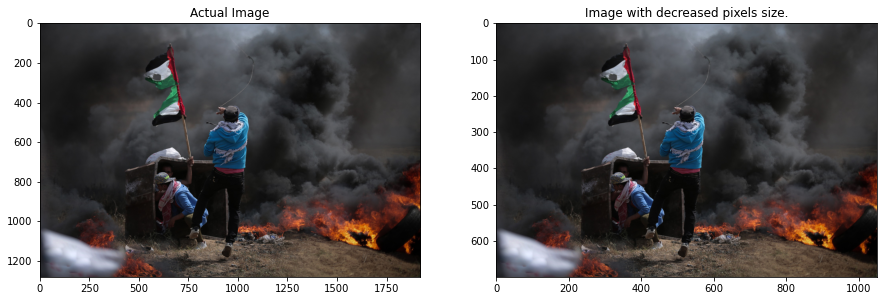

In [7]:
plt.figure(figsize=(15,11))
plt.axis("off")

plt.subplot(121)
plt.title('Actual Image')
plt.imshow(actual_image)

plt.subplot(122)
plt.title('Image with decreased pixels size.')
plt.imshow(update_image)
plt.show()

### convert the updated image into array

In [8]:
red,green,blue =[],[],[]
for row in update_image:
    for red_val, green_val, blue_val in row:
        red.append(red_val)
        green.append(green_val)
        blue.append(blue_val)
print(row)

[[29 30 34]
 [29 30 34]
 [28 29 33]
 ...
 [35 36 23]
 [40 41 27]
 [46 49 32]]


### Normalizing the group of observations on a per feature basis

##### import 'whiten' so that feature is divided by its standard deviation across all observations to give it unit variance

In [9]:
from scipy.cluster.vq import whiten

In [10]:
scaled_red = whiten(red)
scaled_blue = whiten(blue)
scaled_green = whiten(green)

#### Data Framing

In [11]:
df = pd.DataFrame({'red':red,'blue':blue,'green':green,'scaled_red':scaled_red,'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,30,30,30,0.796174,0.790533,0.859740
1,30,30,30,0.796174,0.790533,0.859740
2,30,30,30,0.796174,0.790533,0.859740
3,31,31,31,0.822713,0.816884,0.888398
4,30,30,30,0.796174,0.790533,0.859740
...,...,...,...,...,...,...
734995,31,22,33,0.822713,0.579724,0.945714
734996,33,24,35,0.875792,0.632426,1.003030
734997,35,23,36,0.928870,0.606075,1.031688
734998,40,27,41,1.061566,0.711480,1.174978


#### Setting classification by KMeans and set number of 'k' or cluster becouse colors are in groups so this is the best choice for this problem

In [12]:
k_means= KMeans(n_clusters=12)
k_means.fit(img_pixels)
print(k_means.cluster_centers_)

[[ 16.54809359  62.0372617   97.34597054]
 [ 62.86834083  60.96012848  61.00866927]
 [ 13.34352916  11.58303663  10.52252252]
 [191.91458206 199.22871089 216.90133357]
 [ 78.22724294  80.19318644  84.30658757]
 [ 46.12139221  43.97659796  44.48759372]
 [100.46142031  40.19999096  30.70152692]
 [137.24589544 144.87837546 159.17660402]
 [187.64868729  98.02235508  40.84884325]
 [103.12200543  79.49669672  66.27485182]
 [105.72484414 107.33828881 111.58563006]
 [ 29.85910056  27.29037769  27.14027082]]


#### convert cluster into a common array for the colours

In [13]:
clr_array = np.asarray(k_means.cluster_centers_, dtype='uint8')
print(clr_array)

[[ 16  62  97]
 [ 62  60  61]
 [ 13  11  10]
 [191 199 216]
 [ 78  80  84]
 [ 46  43  44]
 [100  40  30]
 [137 144 159]
 [187  98  40]
 [103  79  66]
 [105 107 111]
 [ 29  27  27]]


#### Again show the orignal image for just visualization against its extracted dominent colours

_________Original Image_________


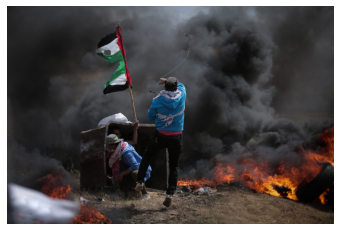

In [14]:
print("_________Original Image_________")
plt.axis('off')
plt.imshow(actual_image)
plt.show()

#### Showing the dominent colour bar

Dominant 12 _________Colours of Image___________ 


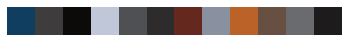

In [15]:
print("Dominant",12,"_________Colours of Image___________ ")
plt.axis('off')
plt.imshow([clr_array])
plt.show()

#### Get the amount of dominance with respect to percentage of each dominant colour

In [16]:
pixels_amount = np.unique(k_means.labels_, return_counts=True)[1]
percentage = pixels_amount/img_pixels.shape[0]
percentage

array([0.01255782, 0.19161088, 0.10088163, 0.01560408, 0.12044626,
       0.21702585, 0.03013197, 0.02517959, 0.01045986, 0.04394558,
       0.04818912, 0.18396735])

 #### Constructing a bar chart for the amount of each dominat colour so that the most and minor will be visualize

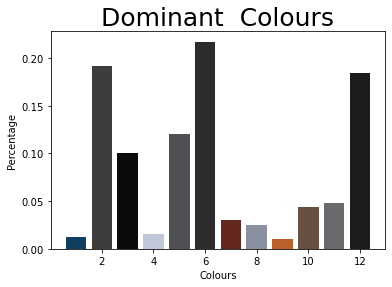

In [17]:
plt.title('Dominant  Colours', size=25)
plt.bar(range(1,13), percentage, color=np.array(clr_array)/255)
plt.ylabel('Percentage')
plt.xlabel('Colours')
plt.show()

##### Sample 2

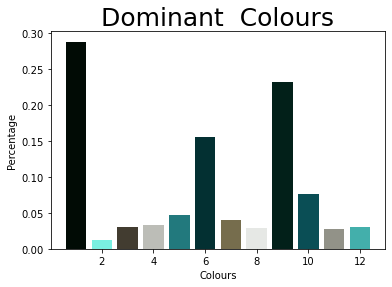

In [20]:
sample_2 = img.imread("satellite.jpg")
row, col = sample_2.shape[:2]
limit = 700
sample2_image = cv2.resize(sample_2, (int(limit*float(col)/row), limit))
sample2_pixels = sample2_image.reshape((-1, 3))
red,green,blue =[],[],[]
for row in update_image:
    for red_val, green_val, blue_val in row:
        red.append(red_val)
        green.append(green_val)
        blue.append(blue_val)
        
scaled_red = whiten(red)
scaled_blue = whiten(blue)
scaled_green = whiten(green)

k_means= KMeans(n_clusters=12)
k_means.fit(sample2_pixels)
sample2_clr_array = np.asarray(k_means.cluster_centers_, dtype='uint8')

sample2_pixels_amount = np.unique(k_means.labels_, return_counts=True)[1]
sample2_percentage = sample2_pixels_amount/sample2_pixels.shape[0]

plt.title('Dominant  Colours of Satellite Image', size=25)
plt.bar(range(1,13), sample2_percentage, color=np.array(sample2_clr_array)/255)
plt.ylabel('Percentage')
plt.xlabel('Colours')
plt.show()

_________Original Image of Satellite_________


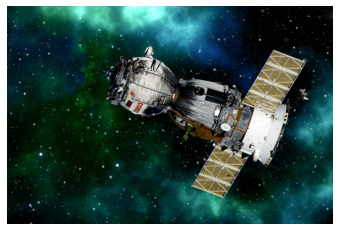

In [22]:
print("_________Original Image of Satellite_________")
plt.axis('off')
plt.imshow(sample2_image)
plt.show()

### sample 3

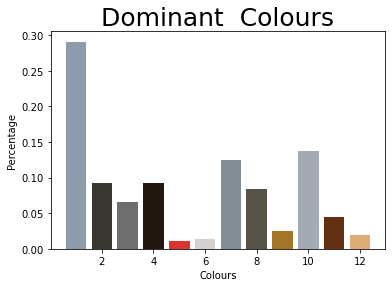

In [23]:
sample_3 = img.imread("srinagar.jpg")
row, col = sample_3.shape[:2]
limit = 700
sample3_image = cv2.resize(sample_3, (int(limit*float(col)/row), limit))
sample3_pixels = sample3_image.reshape((-1, 3))
red,green,blue =[],[],[]
for row in update_image:
    for red_val, green_val, blue_val in row:
        red.append(red_val)
        green.append(green_val)
        blue.append(blue_val)
        
scaled_red = whiten(red)
scaled_blue = whiten(blue)
scaled_green = whiten(green)

k_means= KMeans(n_clusters=12)
k_means.fit(sample3_pixels)
sample3_clr_array = np.asarray(k_means.cluster_centers_, dtype='uint8')

sample3_pixels_amount = np.unique(k_means.labels_, return_counts=True)[1]
sample3_percentage = sample3_pixels_amount/sample3_pixels.shape[0]

plt.title('Dominant  Colours', size=25)
plt.bar(range(1,13), sample3_percentage, color=np.array(sample3_clr_array)/255)
plt.ylabel('Percentage')
plt.xlabel('Colours')
plt.show()

_________Original Image of Srinagar_________


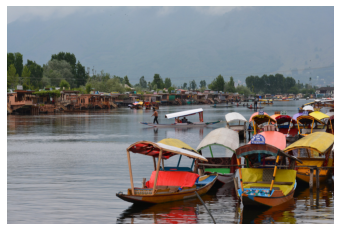

In [24]:
print("_________Original Image of Srinagar_________")
plt.axis('off')
plt.imshow(sample3_image)
plt.show()

***_____________________________ Completed _____________________________***

**Cover Letter !**

Assalamu Alikum Anwar Sir !

My name is Abdul Manan and I'm from Dera Ismail Khan,KPK.I am fresh Graduate as I completed BSCS in 10th October 2022, with 3.7 CGPA from GDC No. 1 that belong to Gomal Univaersity Dera ISmail Khan.The Purpose of writing as a cover letter to you is that currently I am in lahore in a private room for the sack of intern or job in Machine Learning field, my Dream Field but by Allah's will still don't get any opportunity.I have skill but at beginning level and this is the very first sort of program I ever done in OpenCv but done number of projects at reggresssion approach as I mention in my resume.I assure you that I love this filed the actually you are doing because my puposre is attach with it,if you give me chance as a learner ,beginner even at unpaid duaration you will found me a smart and hardworking learner.

Again Thanks for that I gain lot of ideas through this assigments and your explaination in the notes.